In [548]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer


In [549]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [550]:
# Импортируем датасет
df = pd.read_csv(r"C:\Users\marik\afile\123\1\extremism_dataset.csv",on_bad_lines='skip')

In [551]:
df.head()

,text,extremist_type
0,наша раса должна депортировать захватчики,ethnicity
1,наука это полезно,non_extremist
2,трансгуманизм единственное решение,political
3,сегодня облачно,non_extremist
4,африканцы паразиты предприятия,ethnicity


In [552]:
df['extremist_type'].value_counts()

extremist_type
ethnicity        6000
non_extremist    6000
political        6000
religious        6000
Name: count, dtype: int64

In [553]:
# Строки
len(df)

24000

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            24000 non-null  object
 1   extremist_type  24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB


In [555]:
# Проверяем нулевые значения
np.sum(df.isnull())

C:\Users\marik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


text              0
extremist_type    0
dtype: int64

In [556]:
# Все в лист переводим
text, type = list(df['text']), list(df['extremist_type'])

In [557]:
df.iloc[0][0]

C:\Users\marik\AppData\Local\Temp\ipykernel_5808\2900375399.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[0][0]


'наша раса должна депортировать захватчики'

In [558]:
# Кодируем
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['extremist_type_encoded'] = labelencoder.fit_transform(df['extremist_type'])

In [559]:
df[['extremist_type', 'extremist_type_encoded']].value_counts()

extremist_type  extremist_type_encoded
ethnicity       0                         6000
non_extremist   1                         6000
political       2                         6000
religious       3                         6000
Name: count, dtype: int64

In [560]:
# уменьшаем текст
df['text'] = df['text'].str.lower()
df.tail()

,text,extremist_type,extremist_type_encoded
23995,медитация это полезно,non_extremist,1
23996,наука это полезно,non_extremist,1
23997,сегодня дождливо,non_extremist,1
23998,в городе проходит форум,non_extremist,1
23999,живопись это полезно,non_extremist,1


In [561]:
# удаляем мусор 
stopwordlist = ['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как',
                    'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к',
                    'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне',
                    'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему',
                    'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже',
                    'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь',
                    'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего',
                    'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней',
                    'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб',
                    'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет',
                    'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого','это',
                    'эта','мы','они','для','с','наш','кто','от','тех','нам','от','наша',
                    'нашей','наша','своя','свои','своих','должны','должен','стоит','нашими',
                    '-нашей','эти','этой','нас']

In [562]:
# удаляем этот самый мусор
STOPWORDS = set(stopwordlist)
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['text'] = df['text'].apply(lambda text: clean_stopwords(text))

In [563]:
# Удаляем всю пунктуацию

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

df['text'] = df['text'].apply(lambda x : clean_puctuations(x))


In [564]:
df['text'][20]

'беженцы захватывают наши земли'

In [565]:
# Удаляем повторяющиеся буквы
def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

df['text'] = df['text'].apply(lambda x: clean_repeating_characters(x))

In [566]:
df['text'][55]

'религия разрушает людей'

In [567]:
# Удаляем ссылки

def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

df['text'] = df['text'].apply(lambda x : clean_URLs(x))

In [568]:
df['text'][200]

'религия должна аннигилировать захватчики'

In [569]:
# Удаляем все цифры
def clean_numeric(text):
    return re.sub('[0-9]+', '', text)
df['text'] = df['text'].apply(lambda x: clean_numeric(x))

In [570]:
df['text'][223]

'инородцы захватывают наши школы'

In [571]:
# Токенизируем текст
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)

In [572]:
df['text'][24]

['религия', 'унижает', 'государство']

In [573]:
# Приводим слова к изначлаьному состоянию
import nltk
st = nltk.PorterStemmer()
def text_stemming(text):
    text = [st.stem(word) for word in text]
    return text

df['text'] = df['text'].apply(lambda x: text_stemming(x))

In [574]:
df['text'][35]

['камарилья', 'искажает', 'государство']

In [575]:
# Лемитизация слов

lm = nltk.WordNetLemmatizer()

def text_lemmatization(text):
    text = [lm.lemmatize(word) for word in text]
    return text

df['text'] = df['text'].apply(lambda x: text_lemmatization(x))

In [576]:
df['text'].head()

0    [раса, должна, депортировать, захватчики]
1                             [наука, полезно]
2       [трансгуманизм, единственное, решение]
3                           [сегодня, облачно]
4           [африканцы, паразиты, предприятия]
Name: text, dtype: object

In [577]:
df[['extremist_type', 'extremist_type_encoded']].value_counts()


extremist_type  extremist_type_encoded
ethnicity       0                         6000
non_extremist   1                         6000
political       2                         6000
religious       3                         6000
Name: count, dtype: int64

In [578]:
# Создаем облако или быть точнее ссылку на него и убираем все что не экстремизм
new_df = df
new_df = new_df[new_df['extremist_type'] != 'other_extremism']
new_df = new_df[new_df['extremist_type'] != 'non_extremism']
new_df = new_df['text'].apply(lambda x: " ".join(x))

In [579]:
new_df

0        раса должна депортировать захватчики
1                               наука полезно
2          трансгуманизм единственное решение
3                             сегодня облачно
4              африканцы паразиты предприятия
                         ...                 
23995                       медитация полезно
23996                           наука полезно
23997                        сегодня дождливо
23998                   городе проходит форум
23999                        живопись полезно
Name: text, Length: 24000, dtype: object

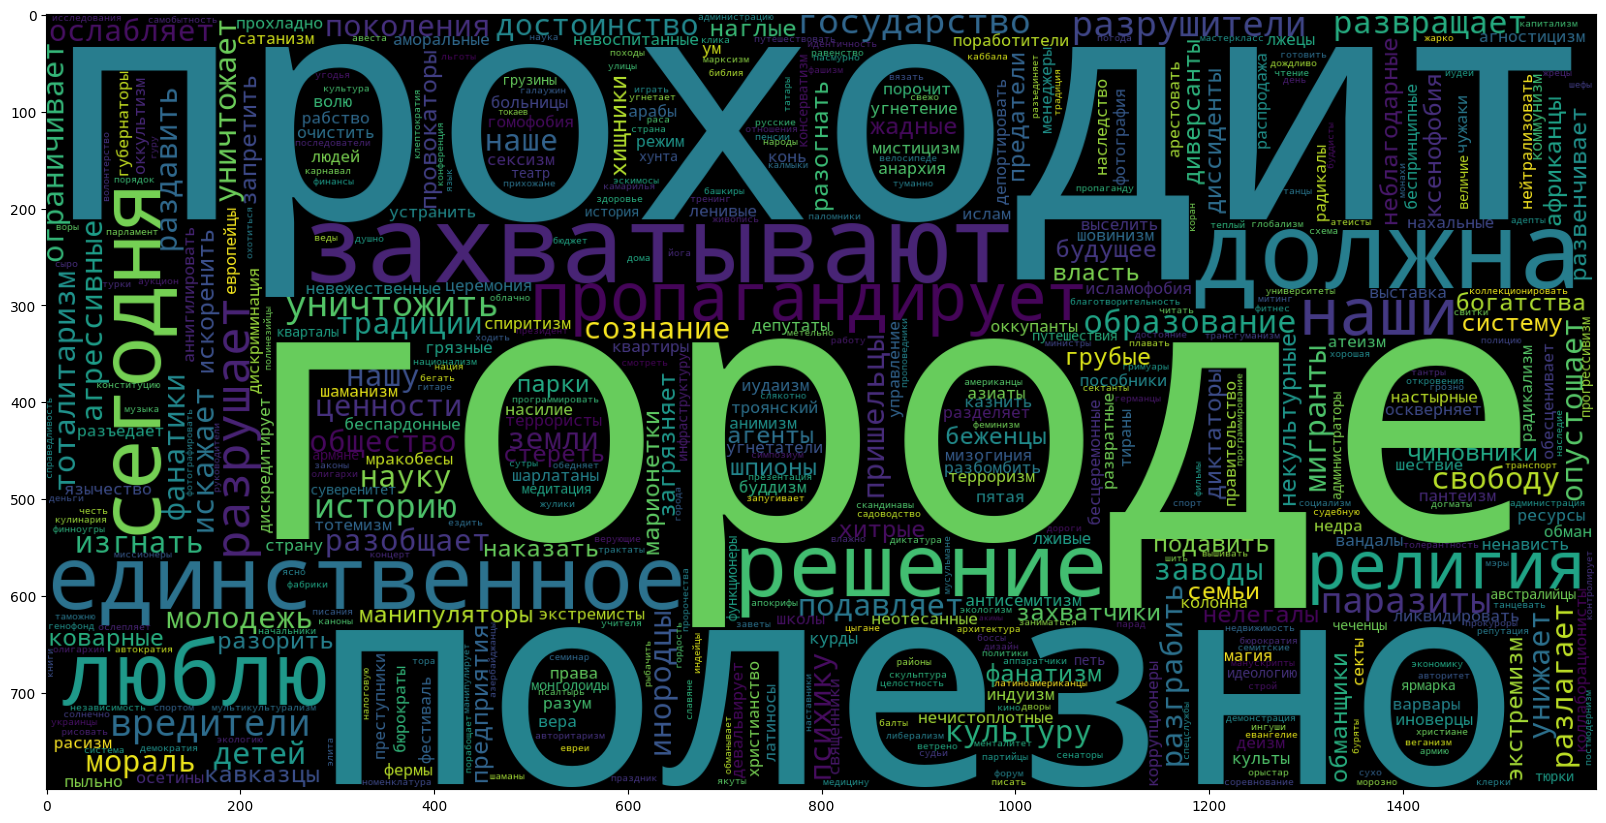

In [580]:
#Прикольные картинки нашел способ изобразить все
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [581]:
# Создаем другое облако слов тех что без не экстремизма
data = pd.read_csv(r"C:\Users\marik\afile\123\1\extremism_dataset.csv",on_bad_lines='skip')
data = data[data['extremist_type'] != "non_extremist"]
data['extremist_type'].value_counts()

extremist_type
ethnicity    6000
political    6000
religious    6000
Name: count, dtype: int64

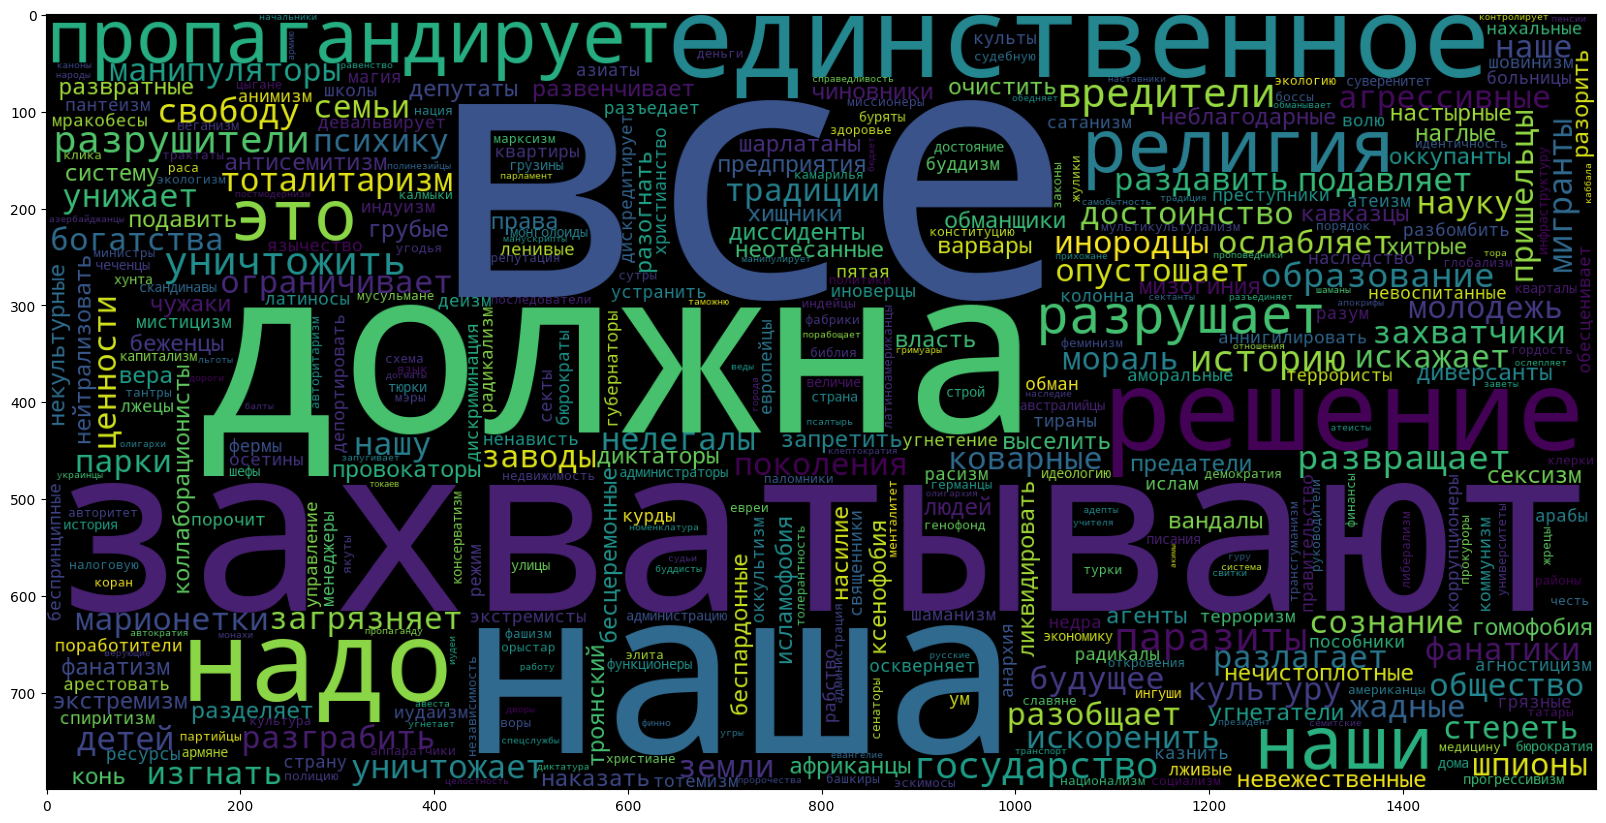

In [582]:
plotting_data = data['text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=500, width= 1600, height= 800, 
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

In [583]:
# Повторяем удаление не экстремистских и других
data_2 = data[data['extremist_type'] != "non_extremist"]
data_2 = data[data['extremist_type'] != "other_extremism"]
data_2['extremist_type'].value_counts()

extremist_type
ethnicity    6000
political    6000
religious    6000
Name: count, dtype: int64

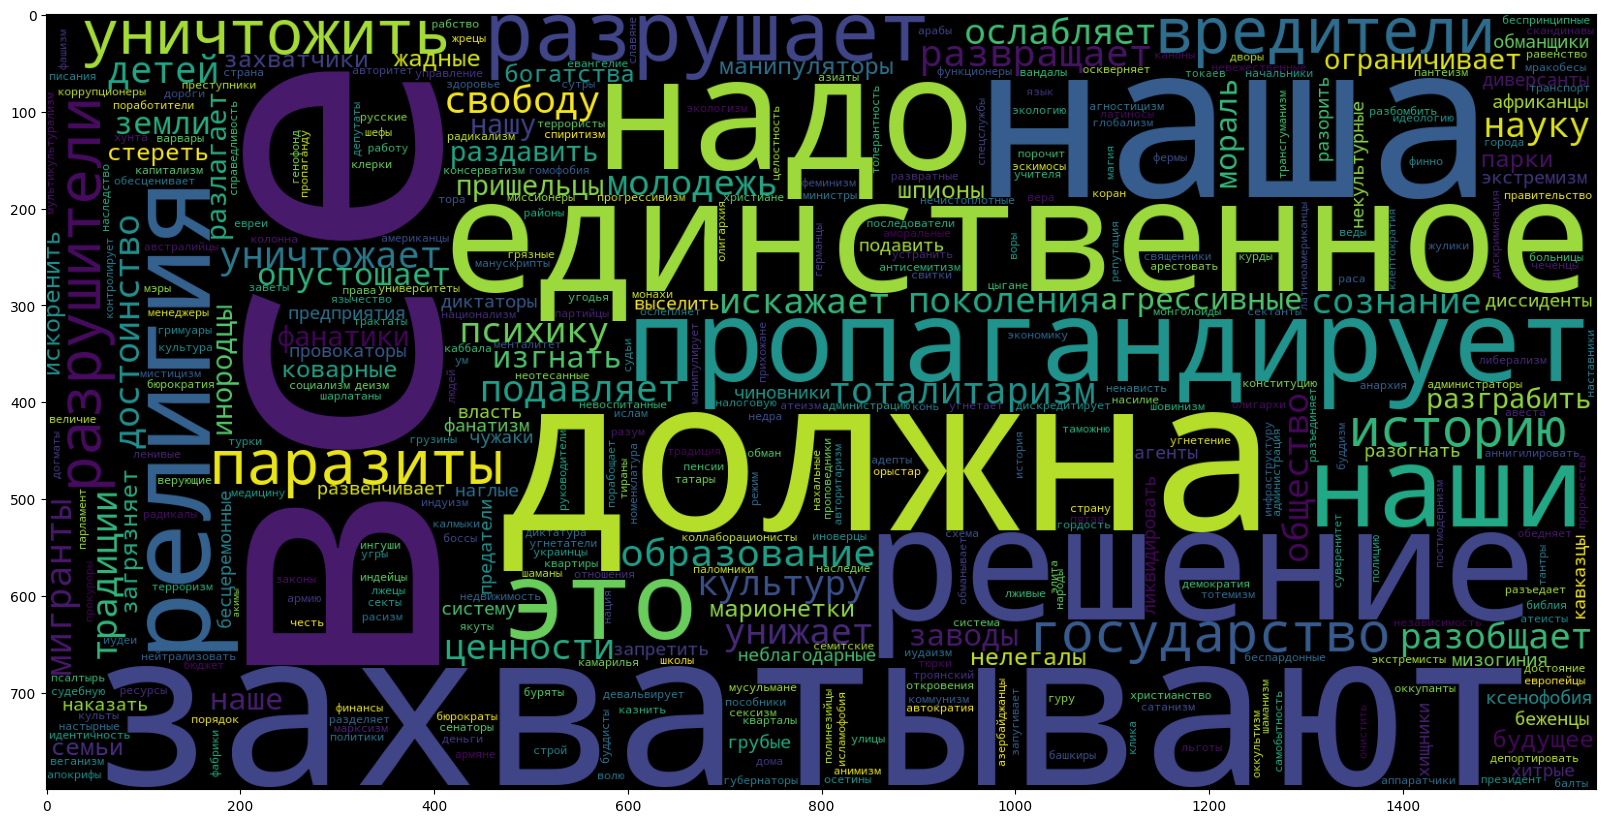

In [584]:
plotting_data = data_2['text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

In [585]:
df

,text,extremist_type,extremist_type_encoded
0,"[раса, должна, депортировать, захватчики]",ethnicity,0
1,"[наука, полезно]",non_extremist,1
2,"[трансгуманизм, единственное, решение]",political,2
3,"[сегодня, облачно]",non_extremist,1
4,"[африканцы, паразиты, предприятия]",ethnicity,0
...,...,...,...
23995,"[медитация, полезно]",non_extremist,1
23996,"[наука, полезно]",non_extremist,1
23997,"[сегодня, дождливо]",non_extremist,1
23998,"[городе, проходит, форум]",non_extremist,1


In [586]:
df['text'] = df['text'].apply(lambda x : " ".join(x))
df

,text,extremist_type,extremist_type_encoded
0,раса должна депортировать захватчики,ethnicity,0
1,наука полезно,non_extremist,1
2,трансгуманизм единственное решение,political,2
3,сегодня облачно,non_extremist,1
4,африканцы паразиты предприятия,ethnicity,0
...,...,...,...
23995,медитация полезно,non_extremist,1
23996,наука полезно,non_extremist,1
23997,сегодня дождливо,non_extremist,1
23998,городе проходит форум,non_extremist,1


In [587]:
# Делим данные на тестовые
X, y = df['text'], df['extremist_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

In [588]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
vectoriser.fit(X_train)
print("No. of feature words: ", len(vectoriser.get_feature_names_out()))

No. of feature words:  5375


In [589]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [590]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

1.0


In [591]:
example = np.zeros(100)
example = ["Казахи одна из главных национальностей Казахстана, то что мы даем другим нациям шанс жить в нашей стране является гигантским подарком для них и они должны иметь благодарность к нам а не то что они сейчас устраивают",]
example = vectoriser.transform(example)
example

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 5375)>

In [592]:
svm_model_linear.predict(example)

array([2])